# Proyecto de analisis de datos de Venta de Viedo Juegos

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

## 📊 Información General
| Aspecto  | Descripcion |
| ------------- |:-------------:|
| Nombre del DataSet      |   vgsales.csv   |
| Período cubierto      | 1980 - 2020    |
| Total de Registros      |   16598   |
| Total de Variables      |   11 columnas   |
| Fuente de Datos      |   Kaggle   |
| Propósito del Análisis      |  Análisis Descriptivo   |

## Estructura de Variables

| Variable  | Descripción | Tipo |
| ------------- |:-------------:|:---------------:|
| Rank     |   Ranking de ventas globales   | int64  |
| Name      | Nombre del Juego    | object |
| Platform      |   Plataforma de lanzamiento   | object |
| Year      |   Año de lanzamiento del juego   | float64 |
| Genre      |   Género del juego   | object |
| Publisher      |  Editor de juego   | object |
| NA_Sales      |  Ventas en America del Norte (millones)  | float64 |
| EU_Sales      |  Ventas en Europa (millones)   | float64 |
| JP_Sales      |  Ventas en Japon (millones)   | float64 |
| Other_Sales      |  Ventas en el resto del mundo (millones)   | float64 |
| Global_Sales      |  Ventas globales (millones)  | float64 |

In [28]:
# leemos el archivo vgsales
vgsales = pd.read_csv('CSV/vgsales.csv')
vgsales.head()

# Identificamos las regiones donde se vendieron los juegos 
regiones = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colmunas_ventas = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']

In [29]:
# observamos la informacion de cada columna
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [30]:
vgsales[colmunas_ventas].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


## Manejo de datos nulos y duplicados

In [31]:
# identificamos los datos nulos que hay por cada columna
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [32]:
# rellenamos los datos de las regiones con su promedio(para que no se altere el promedio real),solo si el valor es NaN
vgsales[regiones] = vgsales[regiones].fillna(vgsales[regiones].mean())

# rellenamos los datos de Global_Sales si es NaN con la suma de las ventas de cada region
vgsales['Global_Sales'] = vgsales['Global_Sales'].fillna(vgsales[regiones].sum(axis=1))
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [33]:
# Primero entender la magnitud del problema
print(f"NaN en Year: {vgsales['Year'].isna().sum()} ({vgsales['Year'].isna().mean()*100:.1f}%)")
print(f"NaN en Publisher: {vgsales['Publisher'].isna().sum()} ({vgsales['Publisher'].isna().mean()*100:.1f}%)")

NaN en Year: 271 (1.6%)
NaN en Publisher: 58 (0.3%)


In [34]:
# eliminamos los datos nulos siempre y cuando en la fila todo los datos sean NaN
filas_antes = len(vgsales)
vgsales = vgsales.dropna(subset=['Year','Publisher'])
filas_ahora = len(vgsales)
print(f'se eliminaran {filas_antes-filas_ahora}')

se eliminaran 307


In [35]:
# verificamos la cnt de datos duplicados 
cnt_duplicados = vgsales.duplicated().sum()

# Eliminamos si hubiera datos duplicados 
if cnt_duplicados > 0:
    vgsales = vgsales.drop_duplicates()
    print(f'Se eliminaron {cnt_duplicados} fila(s)')
else:
    print('No hay datos duplicados en el DataFrame')

No hay datos duplicados en el DataFrame


In [36]:
# vemos la descripcion de los campos numericos
vgsales[colmunas_ventas].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


### Creacion de una funcion para agrupacion de variables

In [37]:
# funcion para agrupar por una columna especifica y que muestre la suma de las ventas 
def agruparBy(columnas: list):
    # Asegurar que columnas sea una lista
    if isinstance(columnas, str):
        columnas = [columnas]

    return vgsales.groupby(columnas)[colmunas_ventas].sum().reset_index()

### Creación de gráficos

In [38]:
# Agrupacion las ventas por años
DataFrame_byYear = agruparBy(['Year'])
DataFrame_byYear

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36
5,1985.0,33.73,4.74,14.56,0.92,53.94
6,1986.0,12.50,2.84,19.81,1.93,37.07
7,1987.0,8.46,1.41,11.63,0.20,21.74
8,1988.0,23.87,6.59,15.76,0.99,47.22
9,1989.0,45.15,8.44,18.36,1.50,73.45


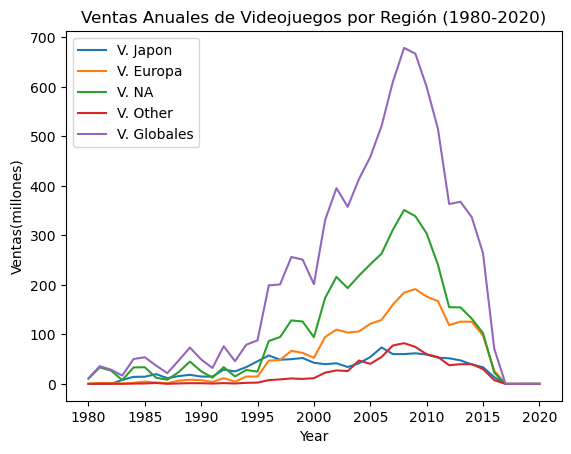

Los datos a partir del Año 2018 son incompletos 


In [39]:
# Cnt. ventas desde el 1980 a 2020 por region
fig, ax = plt.subplots()
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['JP_Sales'],label='V. Japon')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['EU_Sales'],label='V. Europa')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['NA_Sales'],label='V. NA')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['Other_Sales'],label='V. Other')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['Global_Sales'],label= 'V. Globales')
ax.set_xlabel('Year')
ax.set_ylabel('Ventas(millones)')
ax.set_title('Ventas Anuales de Videojuegos por Región (1980-2020)')
ax.legend()
plt.show()
print("Los datos a partir del Año 2018 son incompletos ")

In [40]:
DataFrame_byGenre = agruparBy('Genre').sort_values('Global_Sales',ascending=False)

In [41]:
DataFrame_byName = agruparBy('Name').sort_values('Global_Sales',ascending=False).head(10)

In [42]:
DataFrame_byPlatform = agruparBy('Platform').sort_values('Global_Sales',ascending=False).head(10)

In [43]:
DataFrame_byPublisher = agruparBy('Publisher').sort_values('Global_Sales',ascending=False).head(10)

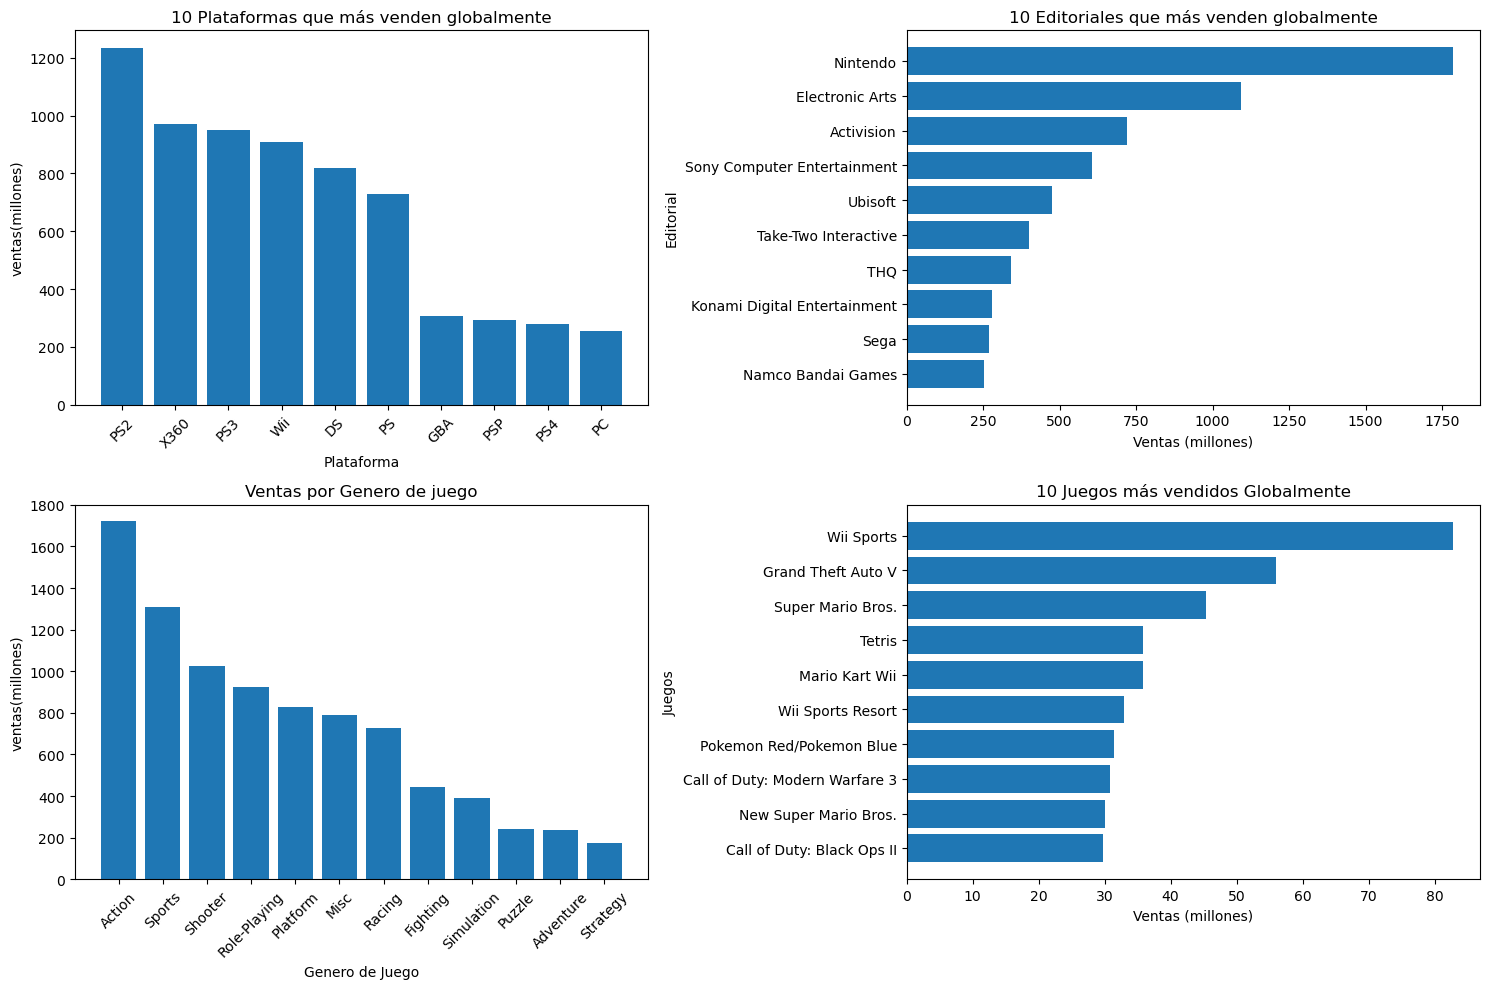

In [44]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))


# Gráfico de barras vertical para las plataformas
ax[0,0].bar(DataFrame_byPlatform['Platform'],DataFrame_byPlatform['Global_Sales'])
ax[0,0].tick_params(axis='x',rotation=45)
ax[0,0].set_title('10 Plataformas que más venden globalmente')
ax[0,0].set_ylabel('ventas(millones)')
ax[0,0].set_xlabel('Plataforma')

# Gráfico horizontal para los 10 Editoriales que más vendio
ax[0, 1].barh(DataFrame_byPublisher['Publisher'], DataFrame_byPublisher['Global_Sales'])
ax[0, 1].set_title('10 Editoriales que más venden globalmente')
ax[0, 1].set_xlabel('Ventas (millones)')
ax[0, 1].set_ylabel('Editorial')
ax[0, 1].invert_yaxis()

# Gráfico de barras vertical para las Genero
ax[1,0].bar(DataFrame_byGenre['Genre'],DataFrame_byGenre['Global_Sales'])
ax[1,0].tick_params(axis='x',rotation=45)
ax[1,0].set_ylim(0,1800)
ax[1,0].set_title('Ventas por Genero de juego')
ax[1,0].set_ylabel('ventas(millones)')
ax[1,0].set_xlabel('Genero de Juego')

# Gráfico horizontal para los 10 juegos más vendidos
ax[1,1].barh(DataFrame_byName['Name'], DataFrame_byName['Global_Sales'])
ax[1,1].set_title('10 Juegos más vendidos Globalmente')
ax[1,1].set_xlabel('Ventas (millones)')
ax[1,1].set_ylabel('Juegos')
ax[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

In [45]:
data = vgsales.groupby('Genre')['Name'].count().reset_index().sort_values('Name',ascending=False)

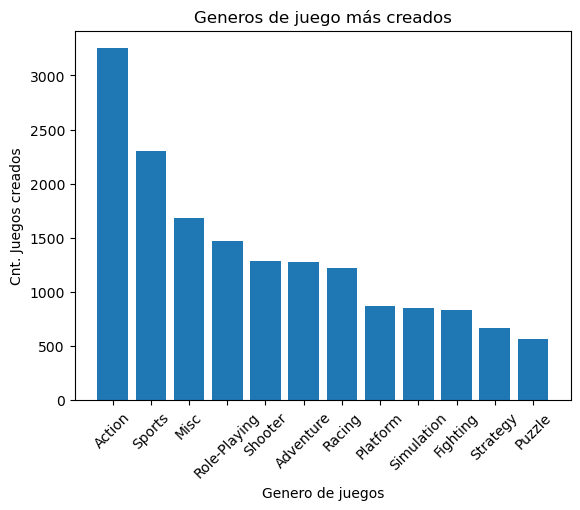

In [46]:
fig, ax = plt.subplots()
ax.bar(data['Genre'],data['Name'])
ax.tick_params(axis='x',rotation= 45)
ax.set_ylabel('Cnt. Juegos creados')
ax.set_xlabel('Genero de juegos') 
ax.set_title('Generos de juego más creados')
plt.show()

### Población de las regiones en desde 1980 - 2020
Los datos fueron sacados del siguiente sitio web [worldometer](https://www.worldometers.info/es/poblacion-mundial/).

In [59]:
Years = [1980, 1985, 1990, 1995,2000,2005,2010,2015,2020]
JP_poblacion = [118358.756, 120832.163, 123399.765, 125672.665, 127027.789,127913.330,128185.275,127275.872,126304.543]
EU_poblacion = [694278.649, 708940.412, 724139.404, 729380.599, 728164.209,732046.515,738145.318,744237.035,749524.044]
NA_poblacion = [254502.386, 267732.944, 281282.372, 297786.727, 312499.985,328282.611,345386.052,362214.161,377734.349]

dfPoblacion = pd.DataFrame({
    'Years': Years,
    'JP_poblacion' : JP_poblacion,
    'EU_poblacion' : EU_poblacion,
    'NA_poblacion' : NA_poblacion,
})

dfPoblacion

,Years,JP_poblacion,EU_poblacion,NA_poblacion
0,1980,118358.756,118358.756,254502.386
1,1985,120832.163,120832.163,267732.944
2,1990,123399.765,123399.765,281282.372
3,1995,125672.665,125672.665,297786.727
4,2000,127027.789,127027.789,312499.985
5,2005,127913.330,127913.330,328282.611
6,2010,128185.275,128185.275,345386.052
7,2015,127275.872,127275.872,362214.161
8,2020,126304.543,126304.543,377734.349


In [67]:
# Crear grupos de 5 años
vgsales['Year_Group'] = (vgsales['Year'] // 5) * 5  # 1980-1984 → 1980, 1985-1989 → 1985, etc.

# Agrupar ventas por períodos de 5 años
ventas_5years = vgsales.groupby('Year_Group')[['JP_Sales', 'NA_Sales', 'EU_Sales']].sum()

print("Ventas agrupadas por 5 años:")
ventas_5years

Ventas agrupadas por 5 años:


,JP_Sales,NA_Sales,EU_Sales
Year_Group,,,
1980.0,22.37,111.95,7.18
1985.0,80.12,123.71,24.02
1990.0,117.89,115.36,42.82
1995.0,254.44,460.75,240.05
2000.0,200.24,897.05,467.11
2005.0,310.45,1506.17,786.97
2010.0,251.32,986.91,714.07
2015.0,47.44,125.48,124.47
2020.0,0.00,0.27,0.00


In [68]:
# Unir ventas con datos de población
ventas_con_poblacion = ventas_5years.merge(dfPoblacion, 
                                         left_index=True, right_on='Years', how='inner')

print("Datos combinados:")
print(ventas_con_poblacion)

# Calcular ventas per cápita para cada región
ventas_con_poblacion['JP_per_capita'] = ventas_con_poblacion['JP_Sales'] / ventas_con_poblacion['JP_poblacion']
ventas_con_poblacion['EU_per_capita'] = ventas_con_poblacion['EU_Sales'] / ventas_con_poblacion['EU_poblacion']
ventas_con_poblacion['NA_per_capita'] = ventas_con_poblacion['NA_Sales'] / ventas_con_poblacion['NA_poblacion']

print("\nVentas per cápita:")
ventas_con_poblacion[['Years', 'JP_per_capita', 'EU_per_capita', 'NA_per_capita']]

Datos combinados:
   JP_Sales  NA_Sales  EU_Sales  Years  JP_poblacion  EU_poblacion  \
0     22.37    111.95      7.18   1980    118358.756    118358.756   
1     80.12    123.71     24.02   1985    120832.163    120832.163   
2    117.89    115.36     42.82   1990    123399.765    123399.765   
3    254.44    460.75    240.05   1995    125672.665    125672.665   
4    200.24    897.05    467.11   2000    127027.789    127027.789   
5    310.45   1506.17    786.97   2005    127913.330    127913.330   
6    251.32    986.91    714.07   2010    128185.275    128185.275   
7     47.44    125.48    124.47   2015    127275.872    127275.872   
8      0.00      0.27      0.00   2020    126304.543    126304.543   

   NA_poblacion  
0    254502.386  
1    267732.944  
2    281282.372  
3    297786.727  
4    312499.985  
5    328282.611  
6    345386.052  
7    362214.161  
8    377734.349  

Ventas per cápita:


,Years,JP_per_capita,EU_per_capita,NA_per_capita
0,1980,0.000189,0.000061,4.398780e-04
1,1985,0.000663,0.000199,4.620649e-04
2,1990,0.000955,0.000347,4.101217e-04
3,1995,0.002025,0.001910,1.547248e-03
4,2000,0.001576,0.003677,2.870560e-03
5,2005,0.002427,0.006152,4.588029e-03
6,2010,0.001961,0.005571,2.857411e-03
7,2015,0.000373,0.000978,3.464249e-04
8,2020,0.000000,0.000000,7.147881e-07


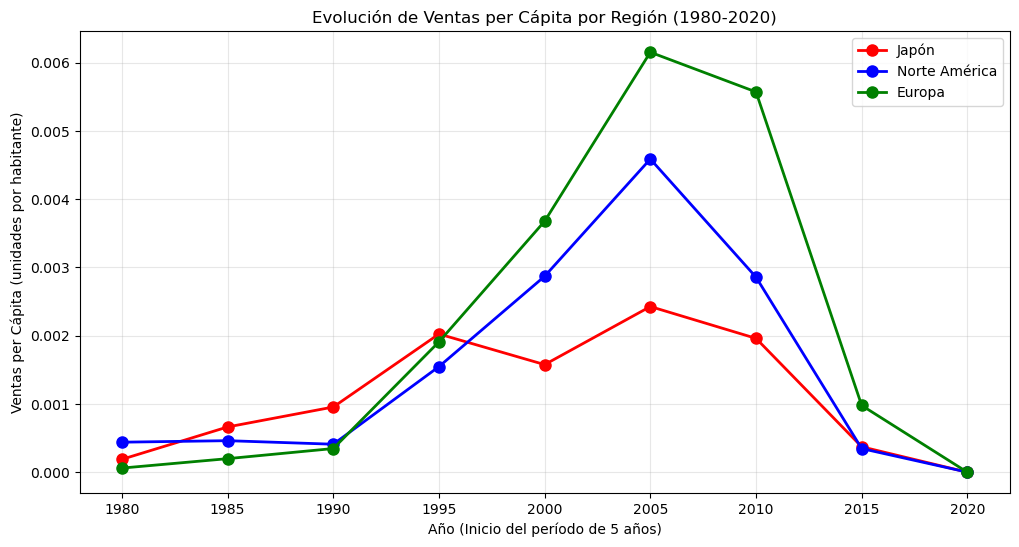

In [69]:
plt.figure(figsize=(12, 6))

# Graficar evolución de ventas per cápita
plt.plot(ventas_con_poblacion['Years'], ventas_con_poblacion['JP_per_capita'], 
         'o-', label='Japón', linewidth=2, markersize=8, color='red')
plt.plot(ventas_con_poblacion['Years'], ventas_con_poblacion['NA_per_capita'], 
         'o-', label='Norte América', linewidth=2, markersize=8, color='blue')
plt.plot(ventas_con_poblacion['Years'], ventas_con_poblacion['EU_per_capita'], 
         'o-', label='Europa', linewidth=2, markersize=8, color='green')

plt.xlabel('Año (Inicio del período de 5 años)')
plt.ylabel('Ventas per Cápita (unidades por habitante)')
plt.title('Evolución de Ventas per Cápita por Región (1980-2020)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(ventas_con_poblacion['Years'])
plt.show()